Caitlin Lindsay Chosen Dataset: Abalone (https://archive.ics.uci.edu/dataset/1/abalone)

In [2]:
!pip install ucimlrepo

In [3]:
#Import dataset
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
abalone = fetch_ucirepo(id=1) 
  
# data (as pandas dataframes) 
X = abalone.data.features
y = abalone.data.targets 
  
# metadata 
#print(abalone.metadata) 
print("\n")  
# variable information 
print(abalone.variables) 



             name     role         type demographic  \
0             Sex  Feature  Categorical        None   
1          Length  Feature   Continuous        None   
2        Diameter  Feature   Continuous        None   
3          Height  Feature   Continuous        None   
4    Whole_weight  Feature   Continuous        None   
5  Shucked_weight  Feature   Continuous        None   
6  Viscera_weight  Feature   Continuous        None   
7    Shell_weight  Feature   Continuous        None   
8           Rings   Target      Integer        None   

                   description  units missing_values  
0         M, F, and I (infant)   None             no  
1    Longest shell measurement     mm             no  
2      perpendicular to length     mm             no  
3           with meat in shell     mm             no  
4                whole abalone  grams             no  
5               weight of meat  grams             no  
6  gut weight (after bleeding)  grams             no  
7      

Data Exploration<br>
$\textbf{TASK: Create a correlation heatmap.}$<br>

$\textbf{TASK: What are the top 5 correlated frequencies with the target\label?}$<br>

Note: You many need to map the label to 0s and 1s.

Additional Note: We're looking for absolute correlation values.

In [12]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'Sex' column
X['Sex_encoded'] = label_encoder.fit_transform(X['Sex'])

X_encoded = X.drop('Sex', axis=1)


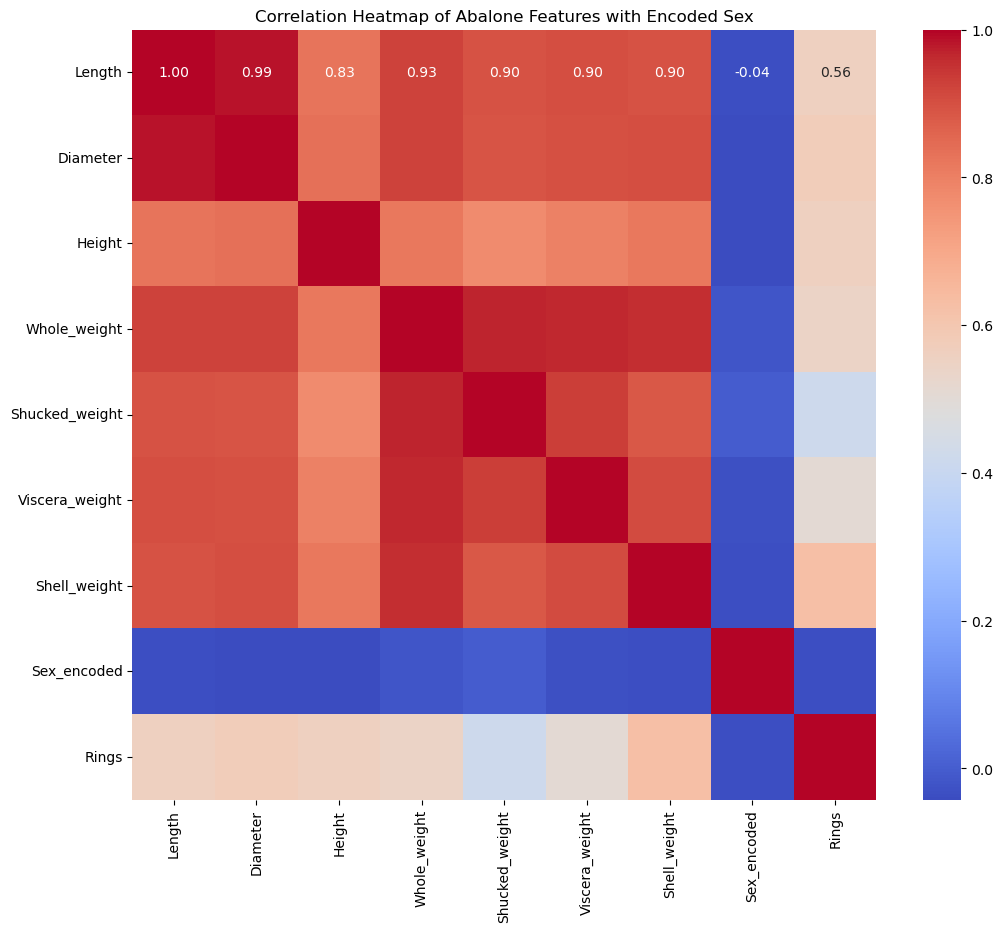

In [13]:
# Combine features and target for correlation analysis, including the new 'Sex_encoded' column
abalone_full = X_encoded.copy()
abalone_full['Rings'] = y.Rings  # Rings is the target

# Calculate correlations
correlation_matrix = abalone_full.corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Abalone Features with Encoded Sex')
plt.show()


In [14]:
# Sorting correlations
top_correlations = correlation_matrix['Rings'].drop('Rings').abs().sort_values(ascending=False)
print("Top 5 correlated features with Rings:")
print(top_correlations.head(5))


Top 5 correlated features with Rings:
Shell_weight    0.627574
Diameter        0.574660
Height          0.557467
Length          0.556720
Whole_weight    0.540390
Name: Rings, dtype: float64


$\textbf{TASK: Split the data into features and labels, and then split into a training set}$<br>
$\textbf{
and test set, with 90% for Cross-Validation training, and 10% for a final test set.}$

In [18]:
from sklearn.model_selection import train_test_split

# Features and labels
X = abalone_full.drop('Rings', axis=1)
y = abalone_full['Rings']

# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)


$\textbf{TASK: Create a PipeLine that contains both a StandardScaler and a KNN model}$

In [19]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# Creating the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])


$\textbf{TASK: Perform a grid-search with the pipeline to test various values of k and report back the best performing parameters.}$

In [20]:
from sklearn.model_selection import GridSearchCV

#grid of values for k
param_grid = {'knn__n_neighbors': range(1, 31)}

# grid search
grid_search = GridSearchCV(pipeline, param_grid, cv=10, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best performing parameters
print("Best parameters:", grid_search.best_params_)


C:\Users\Cait\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


Best parameters: {'knn__n_neighbors': 26}


$\textbf{HARD) TASK: Using the .cv_results_ dictionary, see if you can create a plot of the mean test scores per K value.}$

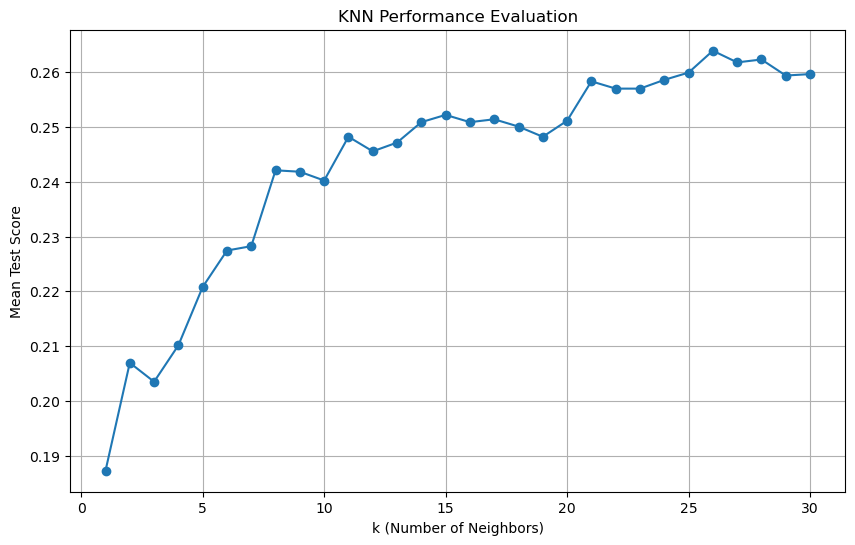

In [21]:
mean_scores = grid_search.cv_results_['mean_test_score']
k_values = range(1, 31)

plt.figure(figsize=(10, 6))
plt.plot(k_values, mean_scores, marker='o')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Mean Test Score')
plt.title('KNN Performance Evaluation')
plt.grid(True)
plt.show()


Final Model Evaluation<br>

$\textbf{TASK: Using the grid classifier object from the previous step, get a final performance classification report and confusion matrix.}$

C:\Users\Cait\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Cait\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Cait\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.22      0.80      0.35         5
           5       0.29      0.12      0.17        16
           6       0.29      0.17      0.21        24
           7       0.39      0.38      0.38        45
           8       0.33      0.42      0.37        55
           9       0.31      0.46      0.37        68
          10       0.30      0.41      0.35        66
          11       0.25      0.36      0.29        36
          12       0.08      0.04      0.05        27
          13       0.00      0.00      0.00        22
          14       0.00      0.00      0.00        13
          15       0.00      0.00      0.00        14
          16       0.00      0.00      0.00         4
          17       0.00      0.00      0.00         4
          18       0.00      0.00      0.00         6
          19       0.00      0.00      0.00         2
          20       0.00    

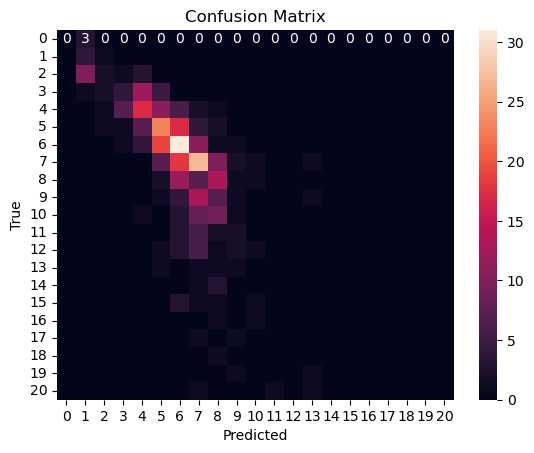

In [22]:
from sklearn.metrics import classification_report, confusion_matrix

# Predicting test set results
y_pred = grid_search.predict(X_test)

# Classification report
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
